<a href="https://colab.research.google.com/github/Somuraj-krishnamurthy/yolov9/blob/main/Personal_Protective_Equipment_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step 01: Clone the YOLOv9 Github Repo**

In [1]:
!git clone https://github.com/Somuraj-krishnamurthy/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 174 (delta 66), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (174/174), 2.10 MiB | 1.58 MiB/s, done.
Resolving deltas: 100% (66/66), done.


#**Step 02: Change Current Directory**

In [2]:
%cd /content/yolov9

/content/yolov9


#**Step 03: Install All the Required Packages**

In [4]:
!pip install -r /content/yolov9/requirements.txt -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.1 MB/s eta 0:00:00


#**Step 04: Download the Model Weights**

**NOTE:** In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.

In [5]:
import os
yolov9 = os.getcwd()
print(yolov9)

/content/yolov9


In [6]:
!mkdir -p yolov9/weights

In [7]:
!wget -P yolov9/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P yolov9/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

In [9]:
!ls -la yolov9/weights

total 237684
drwxr-xr-x 2 root root      4096 Nov 26 15:00 .
drwxr-xr-x 3 root root      4096 Nov 26 14:59 ..
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


#**Step 05: Download the Dataset from Roboflow**

In [10]:
# Install Roboflow
!pip install roboflow

# Initialize Roboflow (no changes needed)
from roboflow import Roboflow
rf = Roboflow(api_key="Oy8pbocAdHivWSijogV6")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov9")

  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov9:: 100%|██████████| 6472/6472 [00:01<00:00, 5554.62it/s]


#**Step 06: Train Custom Model**

In [11]:
%cd /content/yolov9

/content/yolov9


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())


True
1


In [13]:
!python /content/yolov9/train_dual.py --workers 8 --device 0 --batch 8 --data '/content/yolov9/PPE_Detection-2/data.yaml' --img 640 --cfg /content/yolov9/models/detect/yolov9-e.yaml --weights '/content/yolov9/yolov9/weights/yolov9-e.pt' --name yolov9-e-finetuning --hyp hyp.scratch-high.yaml --min-items 0 --epochs 10 --close-mosaic 15


2024-11-26 15:14:56.752159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 15:14:56.771407: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 15:14:56.777240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 15:14:56.791562: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 15:14:57.967556: W tensorflow/comp

#**Download Weights From the Drive**

In [14]:
!gdown "https://drive.google.com/uc?id=140oaWpcxsbZM9glqzeUYHR5gQT_wERX6&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=140oaWpcxsbZM9glqzeUYHR5gQT_wERX6&confirm=t
To: /content/yolov9/best.pt
100% 140M/140M [00:05<00:00, 24.6MB/s]


##**Step 07: Examine Training Results**

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [15]:
!ls /content/yolov9/runs/train/yolov9-e-finetuning2

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1732634103.fe781b789c1b.5406.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


In [16]:
from IPython.display import Image

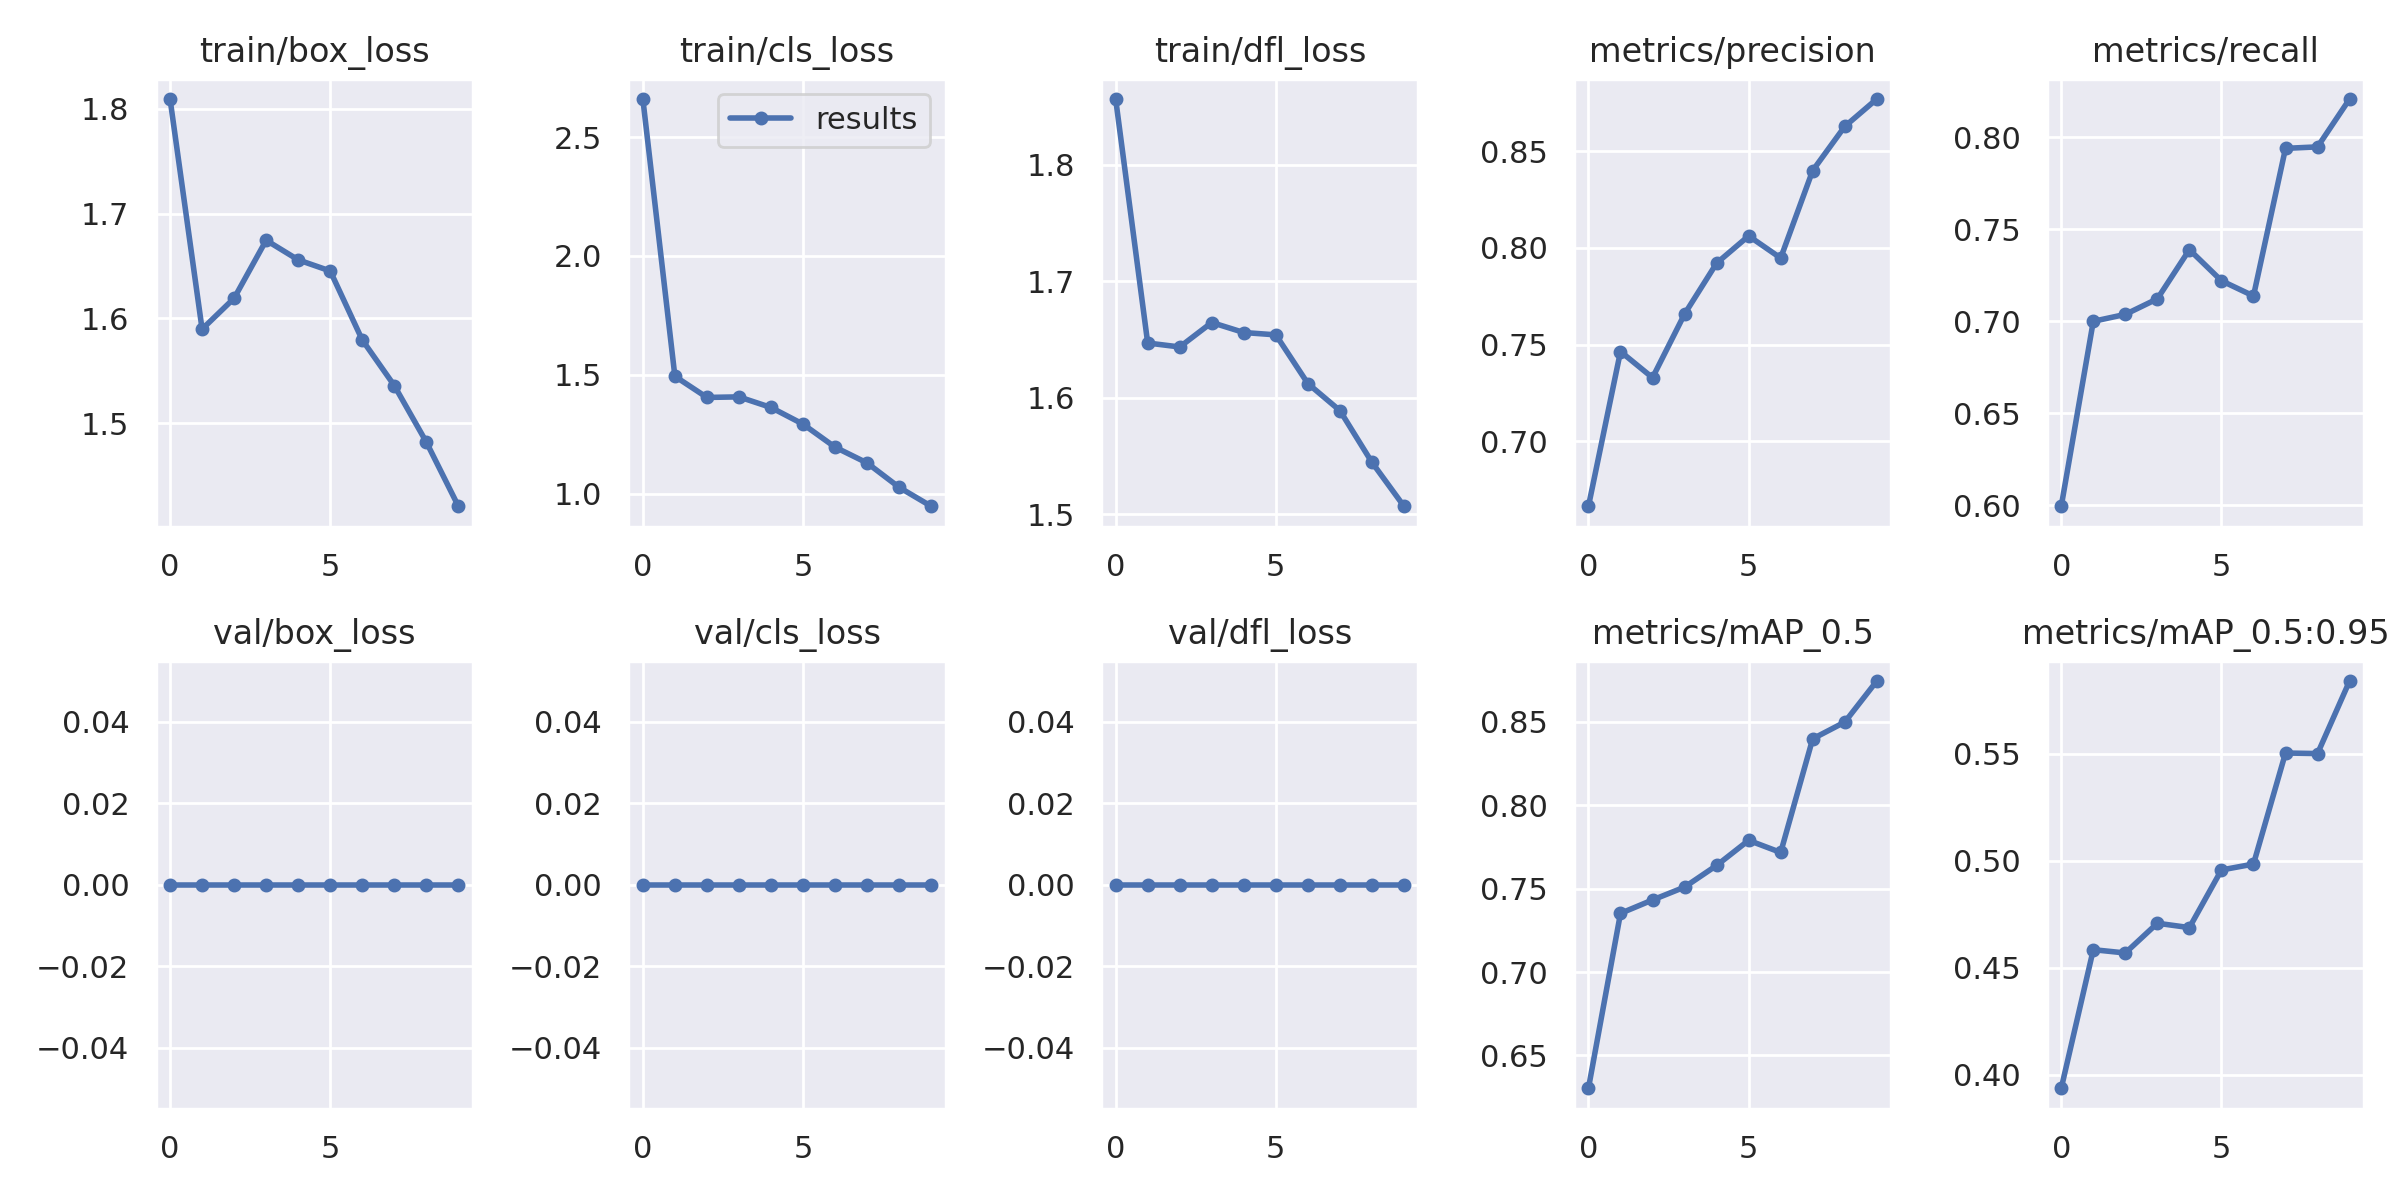

In [17]:
Image(filename=f"/content/yolov9/runs/train/yolov9-e-finetuning2/results.png", width=1000)

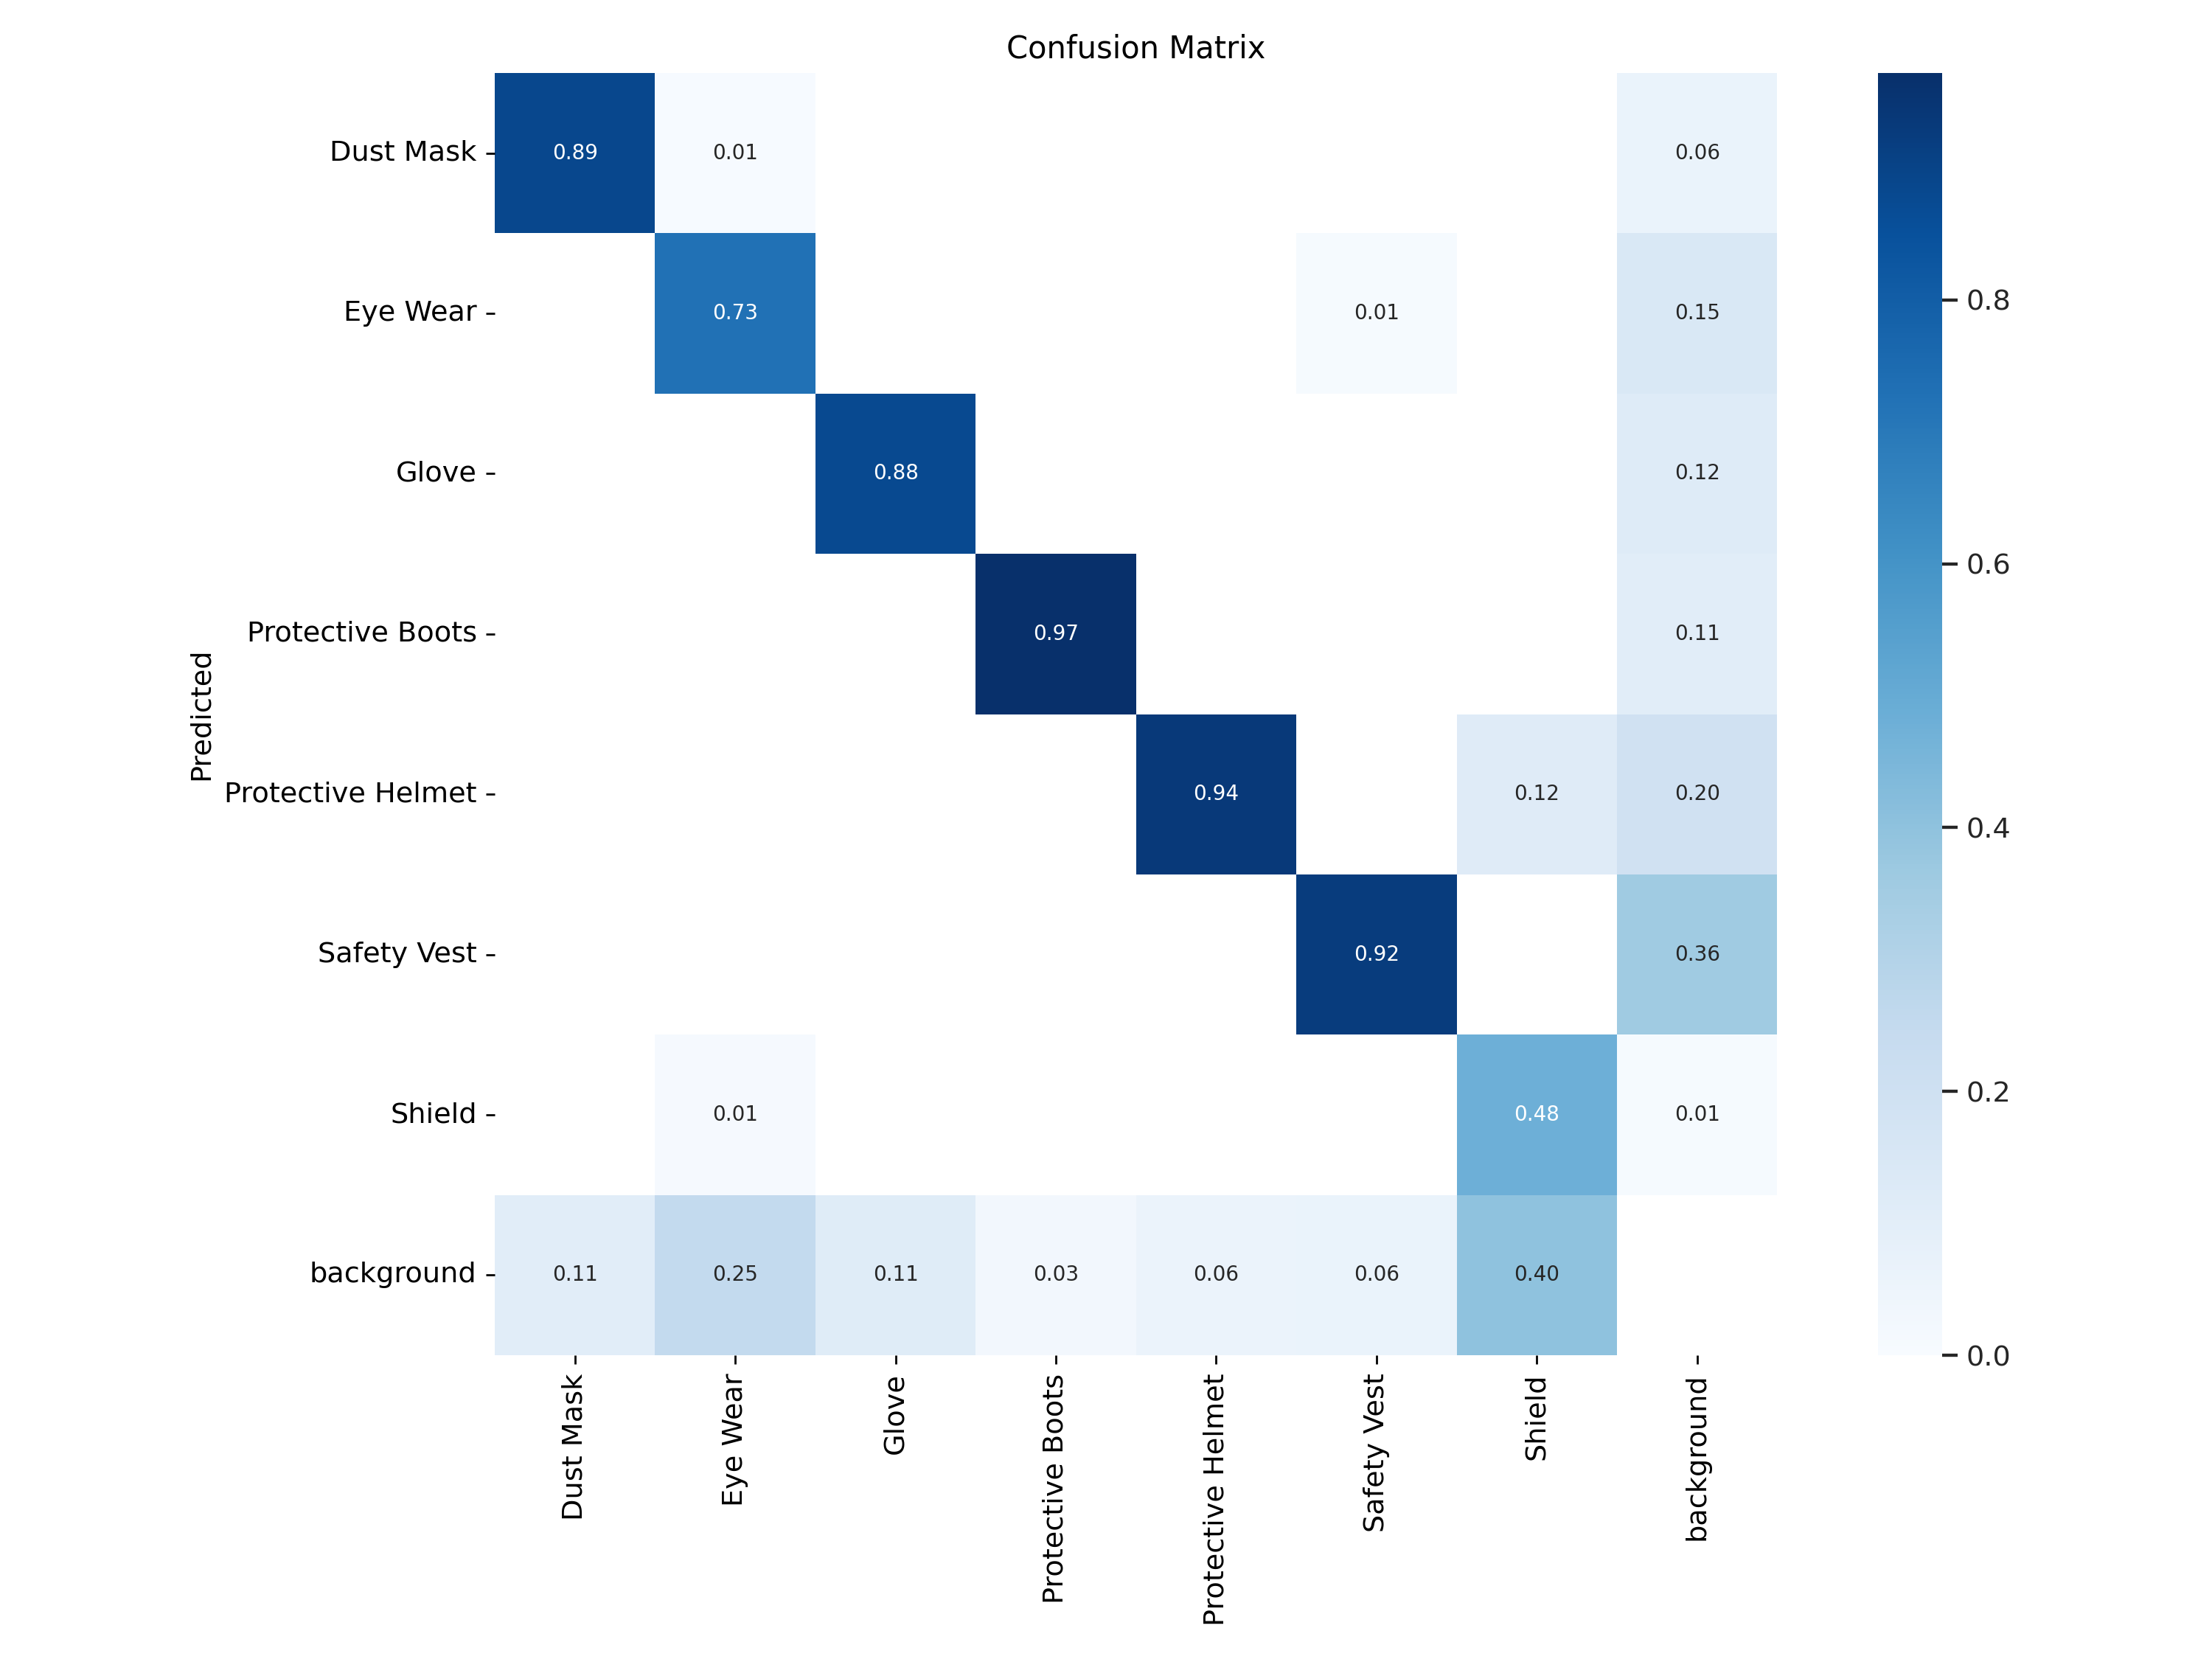

In [19]:
Image(filename=f"/content/yolov9/runs/train/yolov9-e-finetuning2/confusion_matrix.png", width=1000)

#**Step 08: Validate Custom Model**

In [22]:
# Create the annotations directory
!mkdir -p /content/yolov9/annotations

# Download COCO 2017 annotations
!curl -o /content/yolov9/annotations/instances_val2017.zip http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# Unzip the downloaded file
!unzip /content/yolov9/annotations/instances_val2017.zip -d /content/yolov9/annotations/instances_val2017.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  14.8M      0  0:00:16  0:00:16 --:--:-- 17.1M
Archive:  /content/yolov9/annotations/instances_val2017.zip
  inflating: /content/yolov9/annotations/instances_val2017.json/annotations/instances_train2017.json  
  inflating: /content/yolov9/annotations/instances_val2017.json/annotations/instances_val2017.json  
  inflating: /content/yolov9/annotations/instances_val2017.json/annotations/captions_train2017.json  
  inflating: /content/yolov9/annotations/instances_val2017.json/annotations/captions_val2017.json  
  inflating: /content/yolov9/annotations/instances_val2017.json/annotations/person_keypoints_train2017.json  
  inflating: /content/yolov9/annotations/instances_val2017.json/annotations/person_keypoints_val2017.json  


In [23]:
# evaluate yolov9 models
!python /content/yolov9/val_dual.py --data '/content/yolov9/PPE_Detection-2/data.yaml' --img 640 --batch 16 --conf 0.001 --iou 0.7 --device 0 --weights /content/yolov9/best.pt --save-json --name yolov9_ppe_c_640_val


val_dual: data=/content/yolov9/PPE_Detection-2/data.yaml, weights=['/content/yolov9/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=yolov9_ppe_c_640_val, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 1cc3460 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could b

#**Step 10: Inference on Image**

In [24]:
!git clone https://github.com/ultralytics/ultralytics.git


Cloning into 'ultralytics'...
remote: Enumerating objects: 45026, done.
remote: Counting objects: 100% (463/463), done.
remote: Compressing objects: 100% (288/288), done.
remote: Total 45026 (delta 283), reused 278 (delta 175), pack-reused 44563 (from 1)
Receiving objects: 100% (45026/45026), 38.55 MiB | 14.24 MiB/s, done.
Resolving deltas: 100% (33393/33393), done.


In [25]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 43.5 MB/s eta 0:00:00


#**Step 11: Inference on Video**

In [67]:
!rm -r /content/yolov9/runs/track

In [69]:
# Import necessary modules
from google.colab import files
from IPython.display import display, Javascript, clear_output
import ipywidgets as widgets
import os

# Function to upload files
def upload_files():
    uploaded = files.upload()  # Opens a file upload dialog
    uploaded_files_list = []
    for filename in uploaded.keys():
        print(f'File "{filename}" uploaded successfully.')
        # Save the uploaded file to a known path
        with open(f'/content/{filename}', 'wb') as f:
            f.write(uploaded[filename])
        uploaded_files_list.append(f'/content/{filename}')
    return uploaded_files_list

# Create and display the upload button widget
upload_button = widgets.Button(description="Upload Video/Image")
output = widgets.Output()

uploaded_video_path = None  # Global variable to hold uploaded file path

def on_upload_button_clicked(b):
    global uploaded_video_path
    clear_output(wait=True)
    with output:
        print("Please select the video or image file to upload:")
        uploaded_files = upload_files()
        if uploaded_files:
            uploaded_video_path = uploaded_files[0]  # Use the first uploaded file
            print("Uploaded files:")
            for file in uploaded_files:
                print(file)

upload_button.on_click(on_upload_button_clicked)

# Display the button and output
display(upload_button, output)


Button(description='Upload Video/Image', style=ButtonStyle())

Output()

#**Display the Output Video**

In [71]:
 # Import necessary modules
from google.colab import files
from IPython.display import display, Javascript, clear_output
import ipywidgets as widgets
import os

# Check if a file was uploaded before running the inference
if uploaded_video_path:
    # Step 1: Run person tracking
    print("Running person tracking on the uploaded file...")

    # Define output directory for tracking results
    tracking_output_dir = '/content/yolov9/runs/track/yolov9_ppe_combined_detect/'

    # Create the directory if it doesn't exist
    os.makedirs(tracking_output_dir, exist_ok=True)

    from ultralytics import YOLO

    # Load the YOLO model for person tracking
    model = YOLO('yolov9e.pt')

    # Perform tracking (person class: 0)
    results = model.track(
        source=uploaded_video_path,
        classes=[0],  # Class 0 represents 'person'
        save=True,  # Saves the tracking result
        save_txt=True,
        save_conf=True,
        show=True,  # Displays the video during processing (optional)
        project=tracking_output_dir,  # Save to the desired directory
        name='yolov9_ppe_combined_detect'
    )

    # Ensure that the tracking output is saved
    output_video_path = f'{tracking_output_dir}/PPE_Part1.mp4'
    print(f"Person tracking result saved at: {output_video_path}")

Running person tracking on the uploaded file...
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/310) /content/PPE_Part1 (1).mp4: 384x640 8 persons, 66.8ms
video 1/1 (frame 2/310) /content/PPE_Part1 (1).mp4: 384x640 8 persons, 52.9ms
video 1/1 (frame 3/310) /content/PPE_Part1 (1).mp4: 384x640 8 persons, 41.3ms
video 1/1 (frame 4/310) /content/PPE_Part1 (1).mp4: 384x640 8 persons, 44.0ms
video 1/1 (frame 5/310

In [74]:
 # Import necessary modules
from google.colab import files
from IPython.display import display, Javascript, clear_output
import ipywidgets as widgets
import os

 # Step 2: Run PPE detection on the tracked video
print("Running PPE detection on the tracked video...")

    # Running PPE detection on the output of person tracking
!python /content/yolov9/detect_dual.py --source '/content/yolov9/runs/track/yolov9_ppe_combined_detect/yolov9_ppe_combined_detect/PPE_Part1 (1).avi' --device 0 --weights /content/yolov9/best.pt --name yolov9_ppe_combined_detect --imgsz 640 --save-txt --save-conf

    # Final output video after both tracking and PPE detection
final_output_video_path = f'{tracking_output_dir}/PPE_Part1_with_detection.mp4'
print(f"Final output video with PPE detection saved at: {final_output_video_path}")

Running PPE detection on the tracked video...
detect_dual: weights=['/content/yolov9/best.pt'], source=/content/yolov9/runs/track/yolov9_ppe_combined_detect/yolov9_ppe_combined_detect/PPE_Part1 (1).avi, data=../data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/detect, name=yolov9_ppe_combined_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 1cc3460 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See 

In [81]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/yolov9/runs/detect/yolov9_ppe_combined_detect4/PPE_Part1 (1).mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

FileNotFoundError: [Errno 2] No such file or directory: '/content/result_compressed.mp4'

#**Display the Output Video**

In [ ]:
!rm '/content/result_compressed.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/yolov9/runs/detect/yolov9_ppe_640_detect3/PPE_Part2.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)